In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:01.429851


In [2]:
%%time
mydata = pd.read_csv('NY property data.csv')

CPU times: user 14.3 s, sys: 2.95 s, total: 17.3 s
Wall time: 17.2 s


In [4]:
mydata.columns

Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE'],
      dtype='object')

In [5]:
mydata.dtypes

RECORD        int64
BBLE         object
B             int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [7]:
mydata.dtypes

RECORD        int64
BBLE         object
B             int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [4]:
mydata.head(5).select_dtypes(include=np.number, exclude=None).dtypes

RECORD        int64
B             int64
BLOCK         int64
LOT           int64
LTFRONT       int64
LTDEPTH       int64
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
ZIP         float64
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
dtype: object

In [19]:
mydata_numerical = mydata.select_dtypes(include=np.number, exclude=None)

# pd.DataFrame({
#     "Column Name": mydata_numerical.columns,
#     "Number of Records": mydata_numerical.count(),
#     "Percentage Populated": mydata_numerical.count()/mydata_numerical.shape[0],
#     "Unique Values": mydata_numerical.nunique(),
#     "Mean": mydata_numerical.mean(),
#     "Standard Deviation": mydata_numerical.std(),
#     "Minimum Value": mydata_numerical.min(),
#     "Maximum Value": mydata_numerical.max(),
#     "Number of Zeros": mydata_numerical[mydata_numerical == 0.].count()
# }).to_csv("Numerical Fields Summary Table.csv")

In [3]:
mydata_categorical = mydata.select_dtypes(include=None, exclude=np.number)

pd.DataFrame({
    "Column Name": mydata_categorical.columns,
    "Number of Records": mydata_categorical.count(),
    "Percentage Populated": mydata_categorical.count()/mydata_categorical.shape[0],
    "Unique Values": mydata_categorical.nunique(),
    "Most Common Field Value": [mydata_categorical[col].value_counts().idxmax() for col in mydata_categorical.columns]
}).to_csv("Categorical Fields Summary Table.csv")

In [51]:
mydata.columns

Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE'],
      dtype='object')

<AxesSubplot:xlabel='B', ylabel='count'>

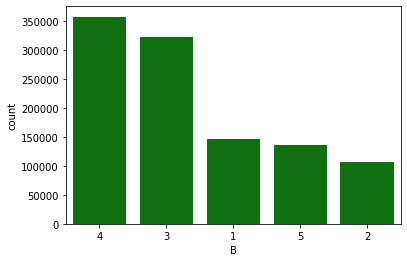

In [5]:
#3. B
sns.countplot(x='B', data=mydata, order=mydata.B.value_counts().index, color='g')

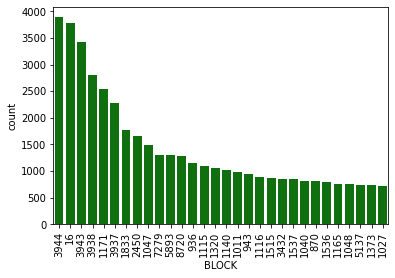

In [7]:
#4. Block: valid block ranges by borough; count plot
sns.countplot(x='BLOCK', data=mydata, order=mydata.BLOCK.value_counts().iloc[:30].index, color='g')
_ = plt.xticks(rotation=90)

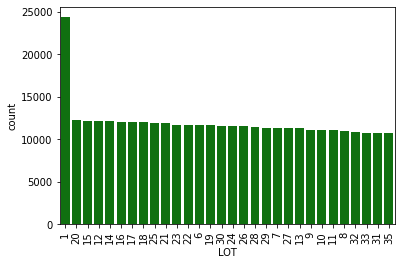

In [8]:
#5. LOT; countplot
sns.countplot(x='LOT', data=mydata, order=mydata.LOT.value_counts().iloc[:30].index, color='g')
_ = plt.xticks(rotation=90)

[Text(0, 0.5, 'Log Scale of Count')]

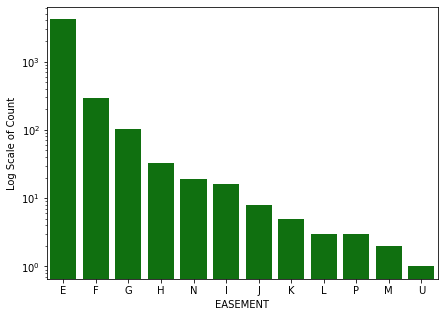

In [28]:
#6. EASEMENT: log count
fig, ax = plt.subplots(figsize=(7,5))
ax.set_yscale('log')
g = sns.countplot(x='EASEMENT', data=mydata, ax=ax, order = mydata['EASEMENT'].value_counts().index, color='g')
ax.set(ylabel="Log Scale of Count")

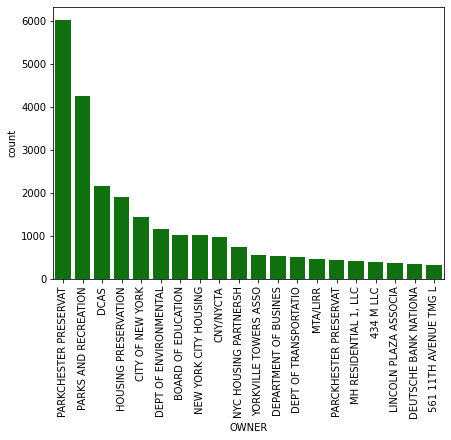

In [29]:
#7. OWNER: 
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x='OWNER', data=mydata, ax=ax, order = mydata['OWNER'].value_counts()[:20].index, color='g')
_ = plt.xticks(rotation=90)

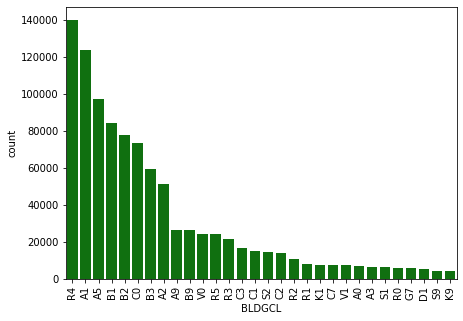

In [30]:
# 8. BLDGCL: 
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x='BLDGCL', data=mydata, ax=ax, order = mydata['BLDGCL'].value_counts()[:30].index, color='g')
_ = plt.xticks(rotation=90)

[Text(0, 0.5, 'Log Scale of Count')]

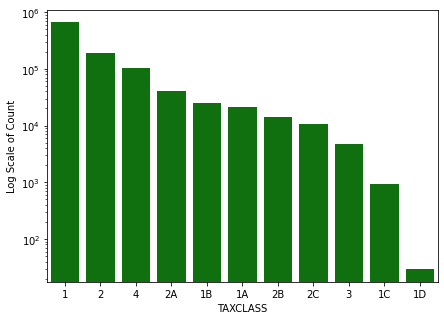

In [31]:
#9. TAXCLASS
fig, ax = plt.subplots(figsize=(7,5))
ax.set_yscale('log')
g = sns.countplot(x='TAXCLASS', data=mydata, ax=ax, order = mydata['TAXCLASS'].value_counts().index, color='g')
ax.set(ylabel="Log Scale of Count")

99.41773716752849

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Count')]

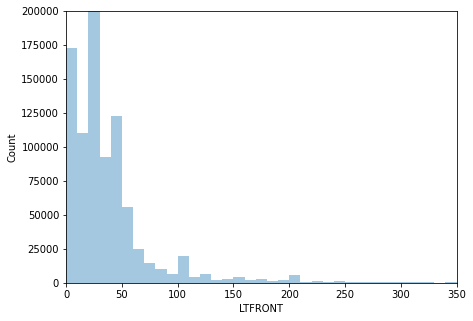

In [12]:
#10. LTFRONT
fig, ax = plt.subplots(figsize=(7,5))
plt.xlim(0,350)
plt.ylim(0,200000)
sns.distplot(mydata.LTFRONT, bins=1000, kde=False)
ax.set(ylabel="Count")

In [18]:
(1- mydata.query("`LTFRONT`>350").shape[0]/mydata.shape[0])*100

99.41773716752849

<AxesSubplot:xlabel='LTDEPTH'>

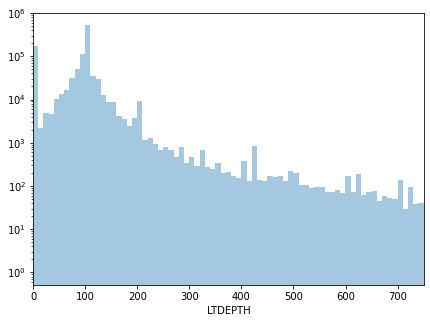

In [33]:
#11. LTDEPTH: log depth in feet
fig, ax = plt.subplots(figsize=(7,5))
plt.xlim(0,750)
ax.set_yscale('log')
sns.distplot(mydata.LTDEPTH, bins=1000, kde=False)

In [20]:
(1- mydata.query("`LTDEPTH`>750").shape[0]/mydata.shape[0])*100

99.8732952752303

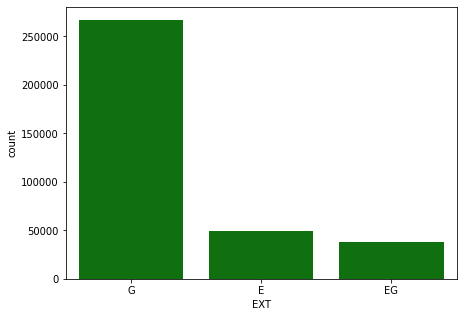

In [6]:
#12. EXT: extension
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x='EXT', data=mydata, ax=ax, order = mydata['EXT'].value_counts().index, color='g')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STORIES'>

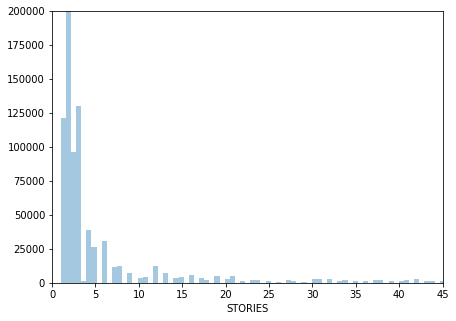

In [35]:
#13. STORIES: number of stories for the building
fig, ax = plt.subplots(figsize=(7,5))
plt.xlim(0,45)
plt.ylim(0,200000)
sns.distplot(mydata.STORIES, bins=200, kde=False)

In [22]:
(1- mydata.query("`STORIES`>45").shape[0]/mydata.shape[0])*100

99.20513093444035

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Count')]

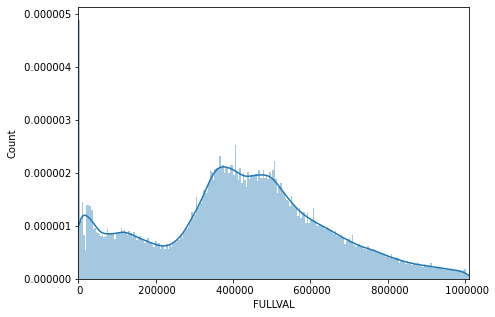

In [9]:
from matplotlib.ticker import FormatStrFormatter
#14. FULLVAL
# fig, ax = plt.subplots(figsize=(9,7))
# # plt.xlim(0, 1009999)
# g = sns.countplot(x='FULLVAL', data=mydata.head(10), ax=ax, order = mydata.head(10)['FULLVAL'].value_counts().index, color='g')
# _ = plt.xticks(rotation=90)
fig, ax = plt.subplots(figsize=(7,5))

# The threshold is beyond the 75th percentile
sns.distplot(mydata.query("`FULLVAL` < 1009999")["FULLVAL"], bins=250, ax=ax)
plt.xlim(0, 1009999)
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('% 0.6f'))
ax.set(ylabel="Count")

In [24]:
(1- mydata.query("`FULLVAL`>1009999").shape[0]/mydata.shape[0])*100

91.41629178127982

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Count')]

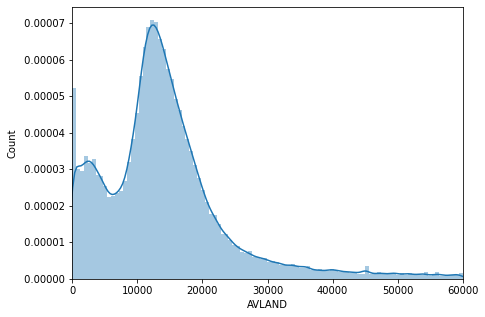

In [10]:
#15. AVLAND: assessed land value
fig, ax = plt.subplots(figsize=(7,5))

# The threshold is beyond the 75th percentile
sns.distplot(mydata.query("`AVLAND` < 60000")["AVLAND"], bins=100, ax=ax)
plt.xlim(0, 60000)
ax.yaxis.set_major_formatter(FormatStrFormatter('% 0.5f'))
ax.set(ylabel="Count")

In [25]:
(1- mydata.query("`AVLAND`>60000").shape[0]/mydata.shape[0])*100

91.61778684100939

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Count')]

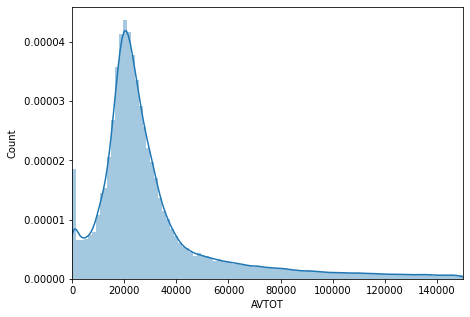

In [34]:
#15. AVTOT
fig, ax = plt.subplots(figsize=(7,5))

# The threshold is beyond the 75th percentile
sns.distplot(mydata.query("`AVTOT` < 150000")["AVTOT"], bins=100, ax=ax)
plt.xlim(0, 150000)
ax.yaxis.set_major_formatter(FormatStrFormatter('% 0.5f'))
ax.set(ylabel="Count")

In [33]:
(1- mydata.query("`AVTOT`>150000").shape[0]/mydata.shape[0])*100

89.58313491952336

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Log Scale of Count')]

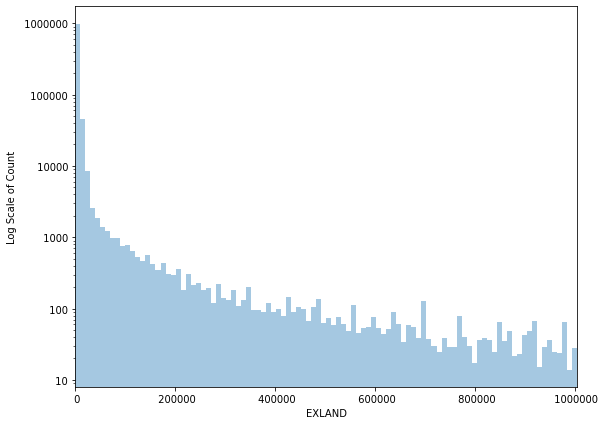

In [42]:
#17. EXLAND
fig, ax = plt.subplots(figsize=(9,7))

# The threshold is beyond the 75th percentile
sns.distplot(mydata.query("`EXLAND` < 1005000")["EXLAND"], bins=100, kde=False, ax=ax)
plt.xlim(0, 1005000)
ax.set_yscale('log')
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
ax.set(ylabel="Log Scale of Count")

In [35]:
(1- mydata.query("`EXLAND`>1005000").shape[0]/mydata.shape[0])*100

99.629316317365

[Text(0, 0.5, 'Log Scale of Count')]

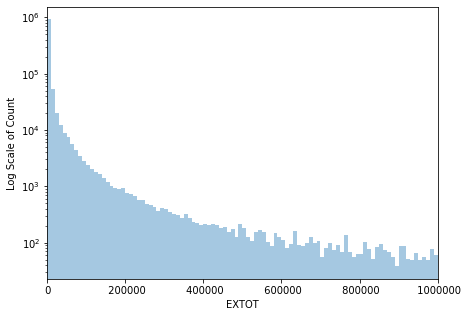

In [43]:
#18. EXTOT
fig, ax = plt.subplots(figsize=(7,5))
sns.distplot(mydata.query("`EXTOT` < 1000000")["EXTOT"], bins=100, kde=False, ax=ax)
plt.xlim(0, 1000000)
ax.set_yscale('log')
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
ax.set(ylabel="Log Scale of Count")

In [36]:
(1- mydata.query("`EXTOT`>100000").shape[0]/mydata.shape[0])*100

96.44862622946533

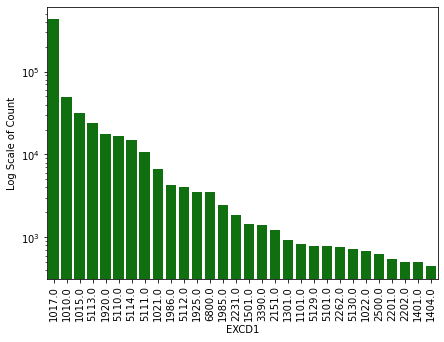

In [44]:
#19. EXCD1

# fig, ax = plt.subplots(figsize=(9,7))
# sns.distplot(mydata.EXCD1, bins=100, kde=False, ax=ax)
# ax.set_yscale('log')
# ax.set(ylabel="Log Scale of Count")

fig, ax = plt.subplots(figsize=(7,5))
ax.set_yscale('log')
g = sns.countplot(x='EXCD1', data=mydata, ax=ax, order = mydata['EXCD1'].value_counts().iloc[:30].index, color='g')
ax.set(ylabel="Log Scale of Count")
_ = plt.xticks(rotation=90)

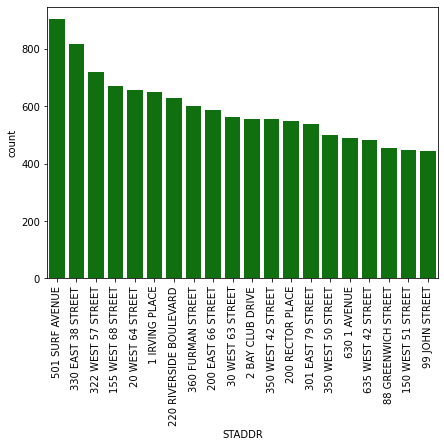

In [45]:
# 20. STADDR:street name for the property

fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x='STADDR', data=mydata, ax=ax, order = mydata['STADDR'].value_counts().iloc[:20].index, color='g')
_ = plt.xticks(rotation=90)

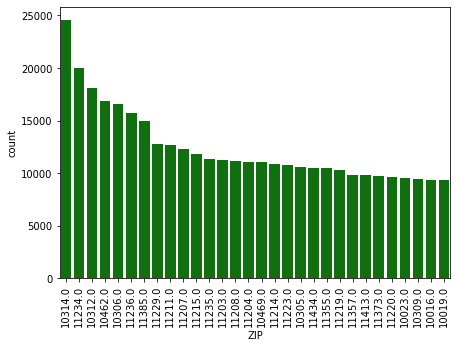

In [46]:
#21. ZIP

fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x='ZIP', data=mydata, ax=ax, order = mydata['ZIP'].value_counts().iloc[:30].index, color='g')
_ = plt.xticks(rotation=90)

[Text(0, 0.5, 'Log Scale of Count')]

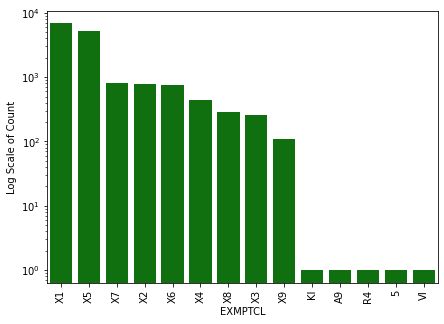

In [47]:
# 22.EXMPTCL: Exempt class used for fully exempt properties only 

fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x='EXMPTCL', data=mydata, ax=ax, order = mydata['EXMPTCL'].value_counts().iloc[:30].index, color='g')
ax.set_yscale('log')
_ = plt.xticks(rotation=90)
ax.set(ylabel='Log Scale of Count')

[Text(0, 0.5, 'Log Scale of Count')]

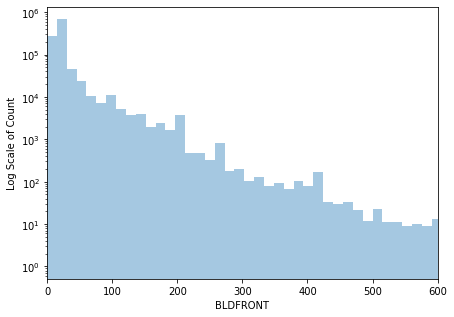

In [51]:
# 23.BLDFRONT
fig, ax = plt.subplots(figsize=(7,5))
plt.xlim(0,600)
ax.set_yscale('log')
sns.distplot(mydata.BLDFRONT, bins=500, kde=False)
ax.set(ylabel='Log Scale of Count')

In [37]:
(1- mydata.query("`BLDFRONT`>600").shape[0]/mydata.shape[0])*100

99.9893556826649

[Text(0, 0.5, 'Log Scale of Count')]

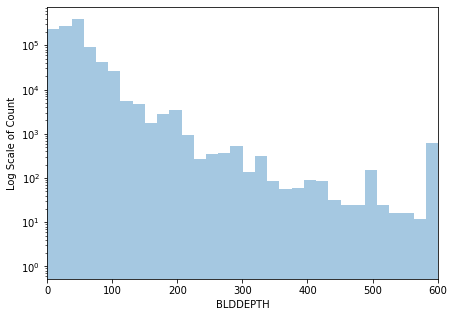

In [50]:
#24. BLDDEPTH

fig, ax = plt.subplots(figsize=(7,5))
plt.xlim(0,600)
ax.set_yscale('log')
sns.distplot(mydata.BLDDEPTH, bins=500, kde=False)
ax.set(ylabel='Log Scale of Count')

In [38]:
(1- mydata.query("`BLDDEPTH`>600").shape[0]/mydata.shape[0])*100

99.98636780411468

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Count')]

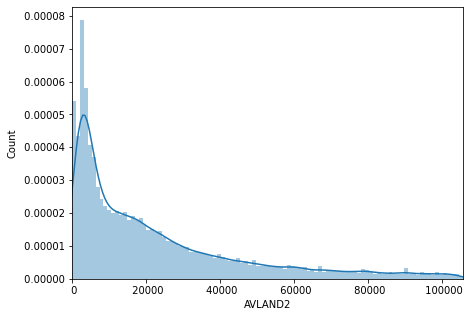

In [60]:
#25. AVLAND2

fig, ax = plt.subplots(figsize=(7,5))
sns.distplot(mydata.query("`AVLAND2` < 105500").AVLAND2, bins=100, ax=ax)
ax.set_xlim(0,105500)
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('% 0.5f'))
# sns.histplot(mydata.sample(frac=0.1, random_state=2345).AVLAND2, bins=1000, kde=False, ax=ax)
# ax.set_yscale('log')
ax.set(ylabel='Count')

# fig, ax = plt.subplots(figsize=(9,7))
# ax.set_yscale('log')
# g = sns.countplot(x='AVLAND2', data=mydata, ax=ax, order = mydata['AVLAND2'].value_counts().iloc[:105500].index, color='g')
# ax.set(ylabel="Log Scale of Count")

In [39]:
(1- mydata.query("`AVLAND2`>105500").shape[0]/mydata.shape[0])*100

95.23050549302798

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Count')]

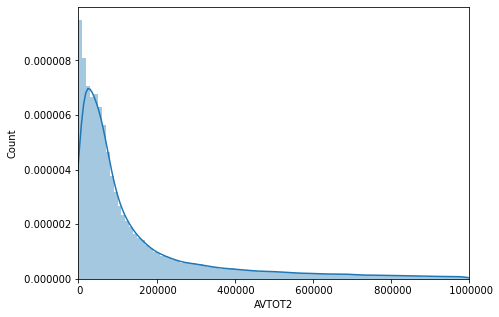

In [40]:
#26. AVTOT2
fig, ax = plt.subplots(figsize=(7,5))
plt.xlim(0,1000000)
sns.distplot(mydata.query("`AVTOT2` < 1000000").AVTOT2, bins=100)
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('% 0.6f'))
ax.set(ylabel='Count')
# ax.set_yscale('log')
# ax.set(ylabel='Log Scale of Count')

In [43]:
(1- mydata.query("`AVTOT2`>1000000").shape[0]/mydata.shape[0])*100

97.78775604718606

[Text(0, 0.5, 'Count')]

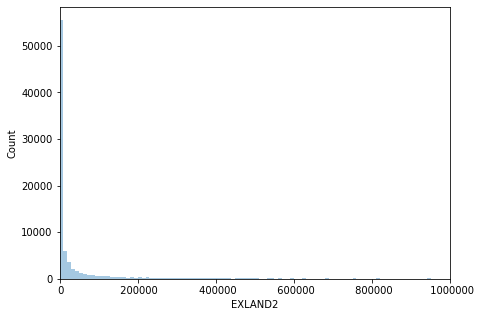

In [68]:
#27. EXLAND2: New exempt land value; exclude > 1000000
fig, ax = plt.subplots(figsize=(7,5))
plt.xlim(0,1000000)
sns.distplot(mydata.query("`EXLAND2` < 1000000").EXLAND2, bins=100, kde=False)
ax.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
# ax.set_yscale('log')
ax.set(ylabel='Count')

In [44]:
(1- mydata.query("`EXLAND2`>1000000").shape[0]/mydata.shape[0])*100

99.66040892852807

<AxesSubplot:xlabel='EXTOT2'>

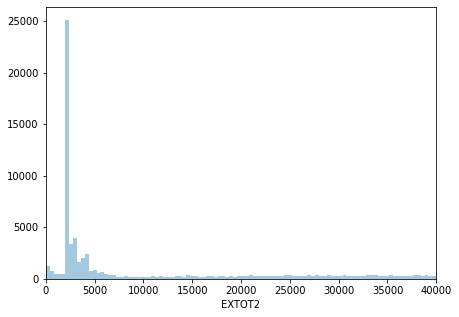

In [70]:
#28. EXTOT2: New exempt total value; exclude > 40000
fig, ax = plt.subplots(figsize=(7,5))
plt.xlim(0,40000)
sns.distplot(mydata.query("`EXTOT2` < 40000").EXTOT2, bins=100, kde=False)
# ax.set_yscale('log')
# ax.set(ylabel='Log Scale of Count')

In [45]:
(1- mydata.query("`EXTOT2`>40000").shape[0]/mydata.shape[0])*100

94.10706315815028

[Text(0, 0.5, 'Log Scale of Count')]

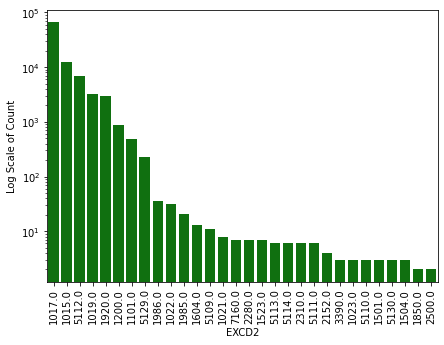

In [71]:
#29. EXCD2

fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x='EXCD2', data=mydata, ax=ax, order = mydata['EXCD2'].value_counts().iloc[:30].index, color='g')
ax.set_yscale('log')
_ = plt.xticks(rotation=90)
ax.set(ylabel='Log Scale of Count')

In [24]:
mydata.PERIOD.dtype

dtype('O')

In [25]:
mydata.PERIOD.nunique()

1

In [26]:
mydata.PERIOD.describe()

count     1070994
unique          1
top         FINAL
freq      1070994
Name: PERIOD, dtype: object